Nama : William Yulio

NIM : 2301869840

Kelas : LD01

### Import Library

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Menginisialisasi library yang akan digunakan selama proses coding

### Load Dataset

In [2]:
dataset = load_digits()
dataset

# Melakukan load dataset yang berasal dari libary "from sklearn.datasets import load_digits"
# Saya memanggil dataset untuk melihat seperti apa bentuk dta aynag akan diolah nantinya dan melihat apakah dataset sudah berhasil diload apa belum

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

<function matplotlib.pyplot.show>

<Figure size 432x288 with 0 Axes>

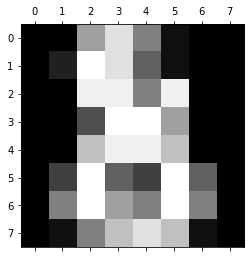

In [3]:
pl.gray()
pl.matshow(dataset.images[1796])
pl.show

# Disini saya mencoba mnelakukan plot image untuk melihat dataset yang terdiri dari banyak angka ini polanya seperti apa
# Ternyata dataset  image dan array ini menyesuaikan target
# Oleh karena itu target akan menjadi patokan utama kita pada saat memilih 2 kelas angka nantinya

In [4]:
data_input = []
data_output = []

# Selanjutnya tiba ditahapan pemilihan 2 kelas yang ingin diklasifikasi nantinya
# Saya membuat dua variabel penampung data, variabel data_input akan menampung data input yaitu 'data'
# sedangkan data_output akan menampung data output yaitu 'target'

### Class Selection

In [5]:
for i in range (len(dataset.images)):
    if dataset.target[i] == 1 or dataset.target[i] == 2:
        data_input.append(dataset.data[i])
        data_output.append(dataset.target[i])

data_input = np.array(data_input)
data_output = np.array(data_output)

# Selanjutnya kita akan memasukkan 2 kelas yang sudah dipilih ke dalam variabel penampung data_input dan kedalam data_output
# saya menggunakan looping sebanyak total dataset yang ada agar 2 kelas yang saya pilih yaitu angka 1 dan 2 masuk semua kedalam variabel penampung
# data yang sudah diseleksi menggunakan fungsi if kemudian dimasukkan menggunakan fungsi append satu per satu
# selanjutnya data diubah kedalam bentuk array menggunakan fungsi np.array agar bisa masuk kedalam tahap selanjutnya yaitu preprocess dan split data

### Preprocess Data

In [6]:
data_input = data_input.reshape((len(data_input), -1))
data_output = data_output.reshape(data_output.shape[0], -1)

data_output = MinMaxScaler().fit_transform(data_output)

# Selanjutnya saya akan merubah bentuk data_input dan data_output, tujuan perubahan bentuk array ini agar bisa dikalkulasi nantinya kedalam fungsi feed forward
# data_output akan dipreprocessing dengan MinMaxScaler sehingga menghasilkan data berupa 0 dan 1, hal ini dilakukan agar bisa disesuaikan dengan activation function yang akan digunakan nantinya yaitu hardlim/binary

### Menghitung Weight dan Bias

In [7]:
weight = np.random.normal(size = (64, 1))
bias = np.random.normal(size = 1)

# Ditahap ini saya membuat weight dan bias dengan mengambil angka random menggunakan function np.random.normal
# size yang ada pada weight dan bias disesuaikan dengan size pada data_input agar bisa dikalkulasikan nantinya di feed forward
# size 1 di bias karena kita hanya membutuhkan 1 bias saja didalam SLP

### Menentukan Epoch dan Learning Rate

In [8]:
Epoch = 4000
L_rate = 0.01

# Pada soal ini saya menggunakan Epoch sejumlah 4000 dan Learning rate sebesar 0.01

### Split Dataset

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.2)

# Pada tahap ini saya akan melakukan split dataset untuk memisahkan data mana yang akan digunakan untuk training dan untuk testing baik itu data input maupun output
# Saya menggunakan fungsi train_test_split() untuk proses split dataset ini dengan data_input sebagai x dan data_output sebagai y
# Sesuai dengan soal saya memisahkan dataset ini dengan ketentuan 80% untuk training dan 20% untuk testing

### Feed Forward Function & Activation Function

In [10]:
def feed_forward(data_input): 
    #W.P + b
    value = np.matmul(data_input, weight) + bias
    return activation_function(value) 

# Hard Limit Activation Function
def activation_function(x):
    if x >= 0:
        return 1
    else:
        return 0

# Selanjutnya saya akan membuat fungsi feed forward yang akan digunakan untuk perhitungan SLP dibawah ini lalu membuat fungsi activation
# untuk fungsi feed_forward kita akan mengkalkulasi perkalian matriks antara variabel data_input dengan weight menggunakan np.matmul kemudian ditambahkan dengan bias
# Sedangkan untuk activation function, saya menggunakan Hardlimit sebagai activation function

### Melakukan Kalkulasi Single Layer Perceptron

In [11]:

for i in range(1, Epoch + 1):

    #Calculate Error and Training
    random_index = np.random.randint(0, len(x_train))
    training = x_train[random_index]
    
    output_training = feed_forward(training)
    error = y_train[random_index] - output_training
    

    #Update weight
    weight = np.add(weight, np.array(training).reshape(64, 1) * L_rate * error)

    #Update Bias
    bias = bias + (L_rate * error)

    #Testing Process
    if i % 500 == 0:
        correct = 0
        for j , inp in enumerate(x_test):
            output_testing = feed_forward(inp)
            if output_testing == y_test[j]:
                correct += 1
              
        print(f'Accuracy : {(correct/len(x_test)) * 100  :.2f}%')
        print(f'Correct Result : {correct}\n')

    # Melalui fungsi ini saya akan menghitung detail seperti error, update weight, update bias, dan menghitung apakah klasifikasi kita tepat atau tidak menggunakan akurasi
    # Saya melakukan loopting sebanyak epoch selanjutnya memanggil variabel randTndex untuk mencari nilai integer secara random dengan batasan sebanyak total data
    # random_index digunakan untuk mengambil data secara acak saat proses data training nanti, sehingga model dapat belajar dengan berbagai pengetahuan baru
    # Selanjutnya variabel data training akan memanggil data x_train secara random menggunakan variabel random_index sebagai penentu index mana yang akan kita gunakan
    # Kemudian masuk kedalam tahap testing, saya akan melakukan test setiap 100 epoch sekali, dimana kita akan membandingkan output testing dengan y_test
    # Apabila mendapatkan hasil yang sesuai maka variabel correct result akan bertambah 1, variabel ini nantinya akan digunakan untuk menghitung akurasi

Accuracy : 95.83%
Correct Result : 69

Accuracy : 100.00%
Correct Result : 72

Accuracy : 100.00%
Correct Result : 72

Accuracy : 100.00%
Correct Result : 72

Accuracy : 100.00%
Correct Result : 72

Accuracy : 100.00%
Correct Result : 72

Accuracy : 100.00%
Correct Result : 72

Accuracy : 100.00%
Correct Result : 72



### Confusion Matrix

In [12]:
y_pred = []
for i in range(0, len(x_test)):
    y_preds = feed_forward(x_test[i])
    y_pred.append(y_preds)

# Saya membuat sebuah variabel penampung guna untuk memasukkan data dari fungsi feed forward(x_test) sebagai hasil prediction menggunakan fungsi append

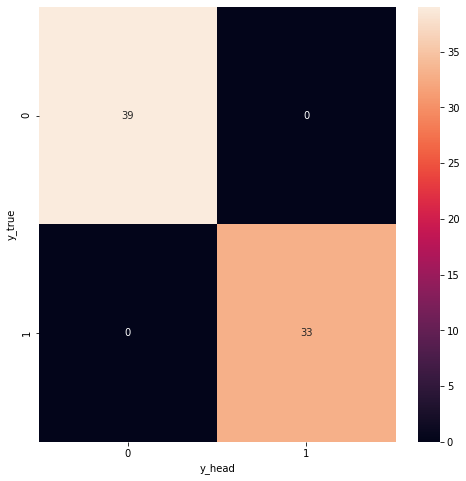

In [13]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

# Selanjutnya saya melakukan ploting untuk membuat confusion matrix dengan menggunakan library seaborn, matplotlib.pyplot, dan sklearn.metrics
# Dapat dilihat bahwa hasil dari confusion matrix menunjukkan nilai yang cukup baik

In [14]:
print(classification_report(y_test, y_pred))

# Selanjutnya saya mencetak classification report untuk melihat data precision, recall, dan akurasi. Ternyata data hasil predicition memiliki tingkat akurasi yang tinggi

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

